In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### autoencoder  

把feature压缩，和pca类似

这段代码主要做的就是把数据从:  
   1. encoder：784—>256—>128，压缩  
   2. decoder：128—>256—>784，解压  
   3. 对比效果

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
# 初始化参数
learning_rate = 0.01
training_epochs = 5       # 5次训练
batch_size = 256
display_step = 1
examples_to_show = 10

In [5]:
# 神经网络的参数
n_input = 784

In [6]:
X = tf.placeholder('float',[None,n_input])

In [7]:
n_hidden_1 = 256 # 第一层特征数
n_hidden_2 = 128 # 第二层特征数
weights = {
    'encoder_h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'encoder_h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'decoder_h1':tf.Variable(tf.random_normal([n_hidden_2,n_hidden_1])),
    'decoder_h2':tf.Variable(tf.random_normal([n_hidden_1,n_input]))
}
biases = {
    'encoder_b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2':tf.Variable(tf.random_normal([n_input]))
}

In [8]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_h1']),biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['encoder_h2']),biases['encoder_b2']))
    return layer_2

In [9]:
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_h1']),biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['decoder_h2']),biases['decoder_b2']))
    return layer_2

In [11]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [13]:
y_pred = decoder_op
y_true = X

In [15]:
cost = tf.reduce_mean(tf.pow(y_true-y_pred,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


Epoch: 0001 cost= 0.089955546
Epoch: 0002 cost= 0.081296913
Epoch: 0003 cost= 0.074912526
Epoch: 0004 cost= 0.074679188
Epoch: 0005 cost= 0.065957204
Optimization finished~


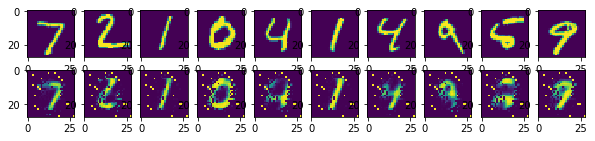

In [16]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            _,c = sess.run([optimizer,cost],feed_dict={X:batch_xs})
        if epoch % display_step == 0:
            print ('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(c))
    print ('Optimization finished~')
    
    encode_decode = sess.run(y_pred,feed_dict={X: mnist.test.images[:examples_to_show]})
    f,a = plt.subplots(2,10,figsize=(10,2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        a[1][i].imshow(np.reshape(encode_decode[i],(28,28)))
    plt.show()